In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats


Confronto lo spessore di una cosa misurata su immagini prese con numero diverso di pixel, e vedo cosa succede nei grafici

In [2]:
# Directory dei file CSV
# Lista dei valori di i
i_values = [64, 128, 256, 512, 1024, 2048, 4096]

# Lista per salvare i DataFrame
dataframes = []

# Importa i file CSV chiamati cervelletto_{i}.csv
for i in i_values:
    file_path = os.path.join(dir_path, f'data_vera/cervelletto_{i}.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dataframes.append(df)
    else:
        print(f"File {file_path} non trovato.")

In [3]:
from plotly.subplots import make_subplots

# Definisci le posizioni: (riga, colonna) per ciascun i_values
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 2)]

fig = make_subplots(
    rows=3,
    cols=3,
    subplot_titles=[f"{i} px" for i in i_values]
)

for idx, df in enumerate(dataframes):
    row, col = positions[idx]
    fig.add_trace(
        go.Scatter(
            x=df['Distance_(microns)'],
            y=df['Gray_Value'],
            mode='lines',
            name=f'CSV {i_values[idx]}',
            line=dict(color='lightgreen')
        ),
        row=row,
        col=col
    )
    # Calcola la FWHM per questo dataframe
    max_value = df['Gray_Value'].max()
    half_max = max_value / 2
    above_half_max = df[df['Gray_Value'] >= half_max]
    if not above_half_max.empty:
        x_min = above_half_max['Distance_(microns)'].min()
        x_max = above_half_max['Distance_(microns)'].max()
        fig.add_vline(
            x=x_min,
            line=dict(color='darkgreen', dash='dash'),
            row=row,
            col=col
        )
        fig.add_vline(
            x=x_max,
            line=dict(color='darkgreen', dash='dash'),
            row=row,
            col=col
        )
        fig.add_annotation(
            x=(x_min + x_max) / 2,
            y=max_value,
            text=f"FWHM: {x_max - x_min:.2f}",
            showarrow=False,
            yshift=20,
            font=dict(color='darkgreen', size=12),
            row=row,
            col=col
        )

fig.update_layout(
    height=700,
    width=1200,
    showlegend=False,
    template='plotly_white'
)
fig.update_xaxes(title_text="Distance (microns)")
fig.update_yaxes(title_text="Gray Value")
fig.show()


In [4]:
fwhm_values = []

for idx, df in enumerate(dataframes):
    max_value = df['Gray_Value'].max()
    half_max = max_value / 2

    # Trova i punti in cui il valore supera la metà del massimo
    above_half_max = df[df['Gray_Value'] >= half_max]

    if not above_half_max.empty:
        # Calcola la larghezza tra i due punti più esterni
        fwhm = above_half_max['Distance_(microns)'].max() - above_half_max['Distance_(microns)'].min()
        fwhm_values.append(fwhm)
        print(f"FWHM del CSV {i_values[idx]}: {fwhm:.2f} microns")
    else:
        print(f"FWHM del CSV {i_values[idx]}: Non calcolabile")

FWHM del CSV 64: 61.51 microns
FWHM del CSV 128: 67.13 microns
FWHM del CSV 256: 66.86 microns
FWHM del CSV 512: 69.77 microns
FWHM del CSV 1024: 68.18 microns
FWHM del CSV 2048: 70.42 microns
FWHM del CSV 4096: 79.87 microns


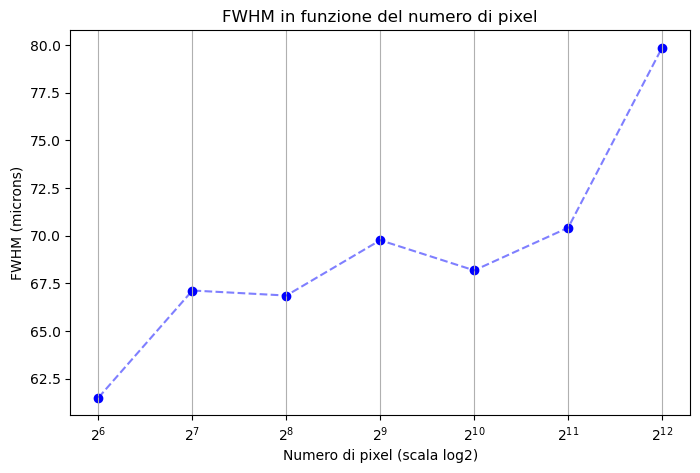

In [ ]:
import numpy as np

media = np.mean(fwhm_values)
dev_std = np.std(fwhm_values, ddof=1)
err_std_media = dev_std / np.sqrt(len(fwhm_values))

print(f"Media: {media:.2f}")
print(f"Deviazione standard: {dev_std:.2f}")
print(f"Errore standard della media: {err_std_media:.2f}")